# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print("Id of houses : {}".format(len(df.Id)))

Id of houses : 1460


In [6]:
def check_missing_value(df):
    missing_features=[]
    for i in df.columns:
        temp = df[i].isnull().sum()
        if temp!=0:
            print(i," feature has ",temp," missing value")
            missing_features.append(i)
    return missing_features

def check_features_datatype(df):
    categorical_feature = [i  for i in df.columns if df[i].dtype == 'O']
    numerical_feature = [i  for i in df.columns if df[i].dtype!= 'O']
    return categorical_feature,numerical_feature

def _check_datatype_is_string(df,feature):
    if df[feature] == 'O':
        return True
    else:
        return False
    

In [7]:
categorical_features , numerical_features = check_features_datatype(df)

In [8]:
print("Features where year is involved : ")
year_feature =[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature ]
year_feature

Features where year is involved : 


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs yearsold')

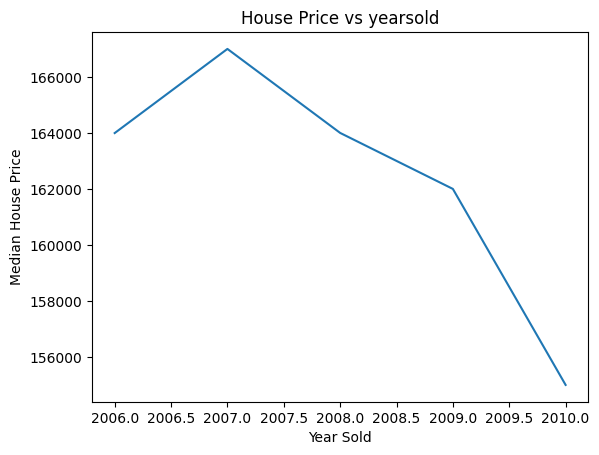

In [9]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Median House Price")
plt.title("House Price vs yearsold")

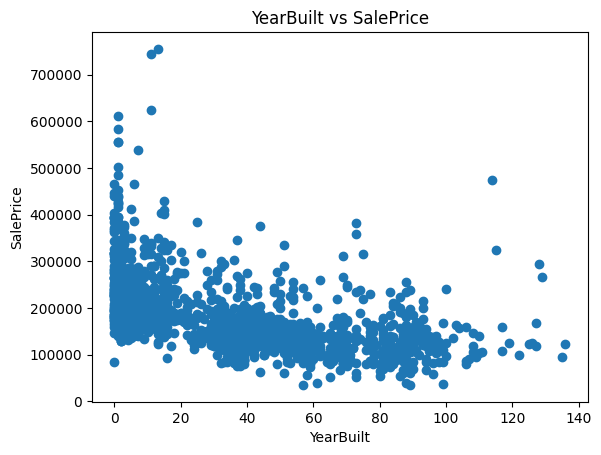

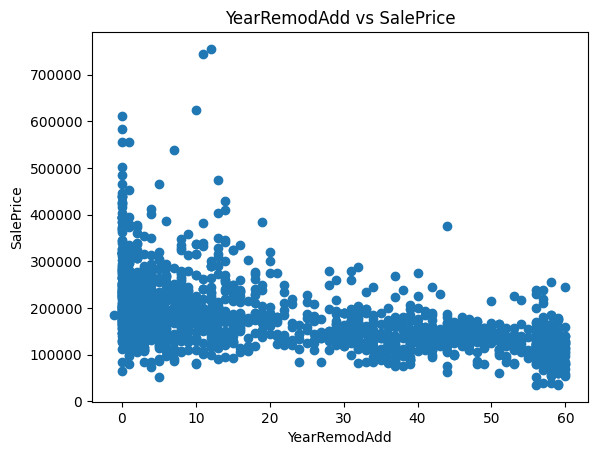

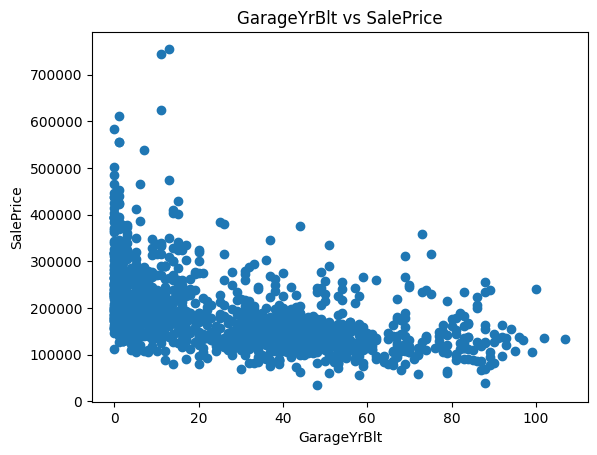

In [10]:
for feature in year_feature:
    if feature != 'YrSold':
        data=df.copy()
        
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title("{} vs SalePrice".format(feature))
        plt.show()

In [11]:
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())< 25 and feature not in year_feature + ['Id']]

print("Discrete Variables Count : {}".format(len(discrete_feature)))

Discrete Variables Count : 17


In [12]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


In [13]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous Variables count : {}".format(len(continuous_feature)))

Continuous Variables count : 16


In [14]:
df[continuous_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


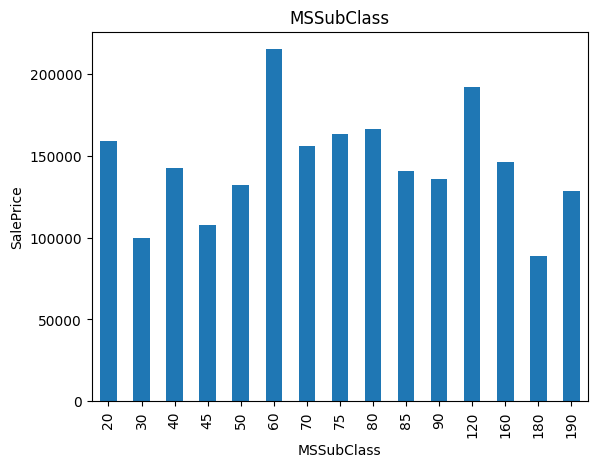

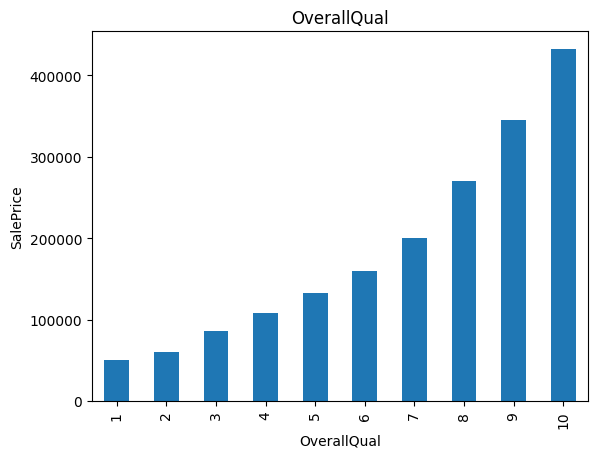

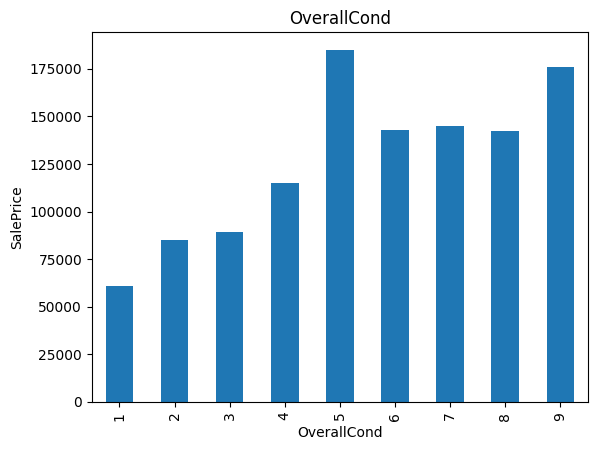

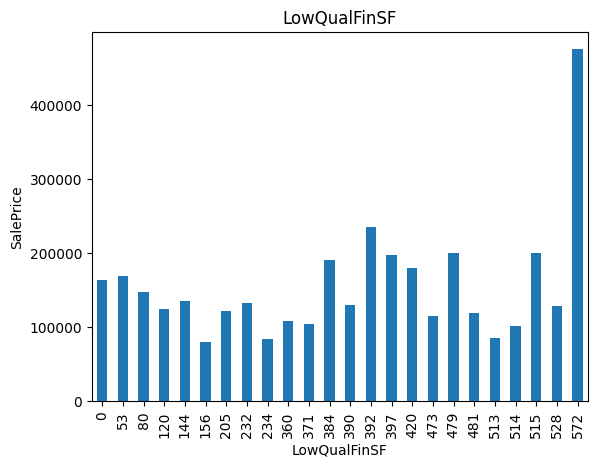

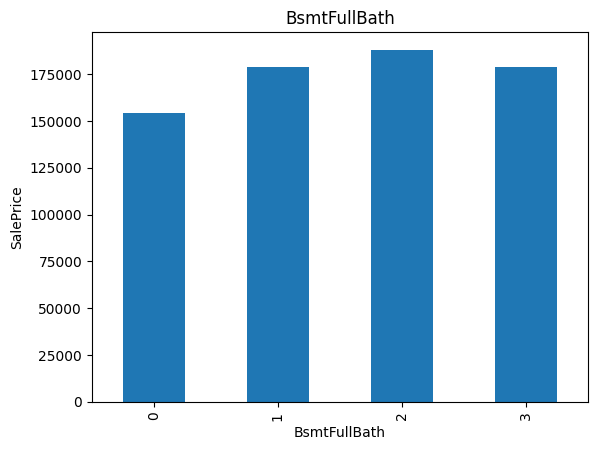

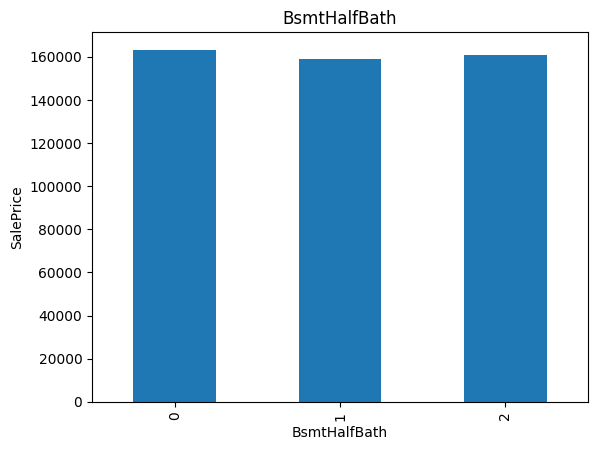

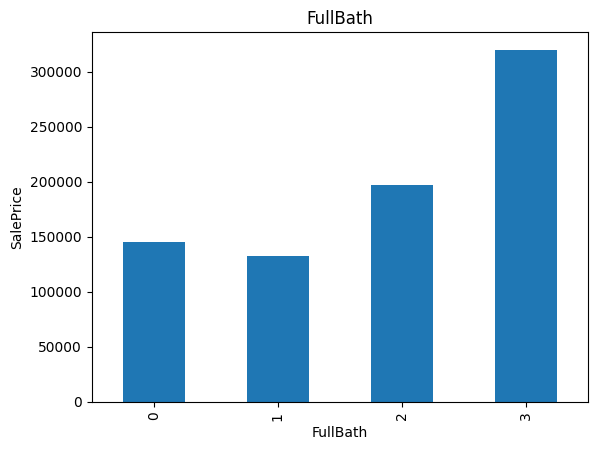

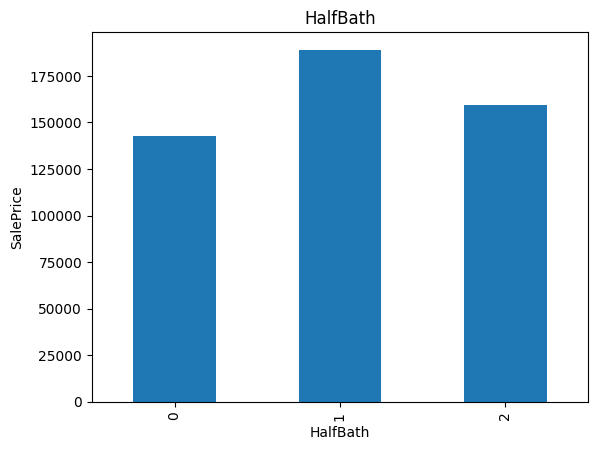

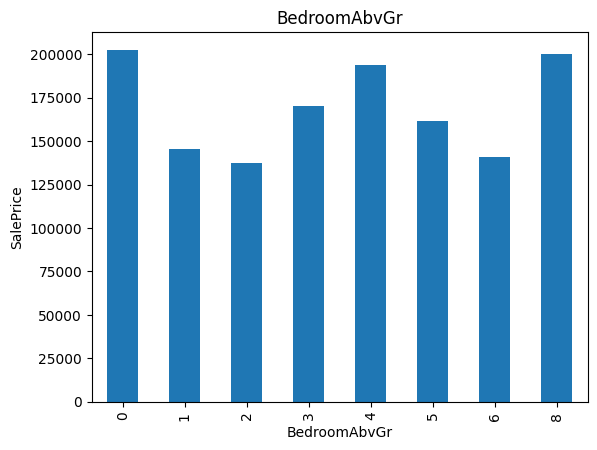

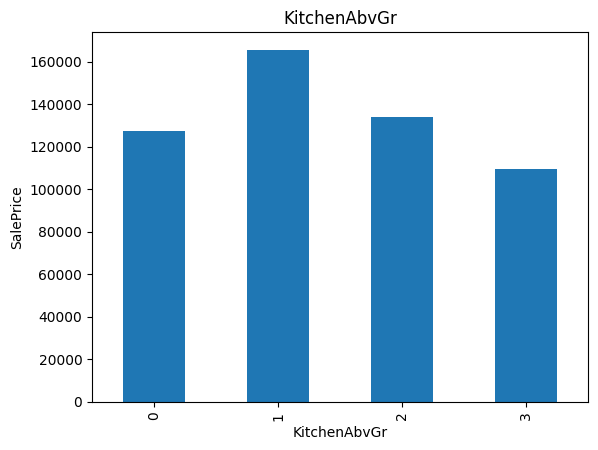

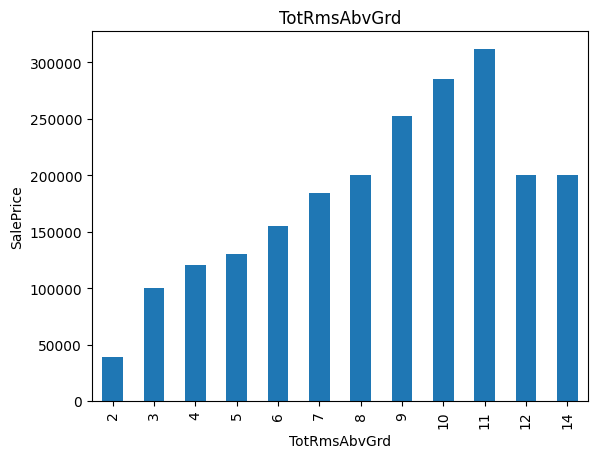

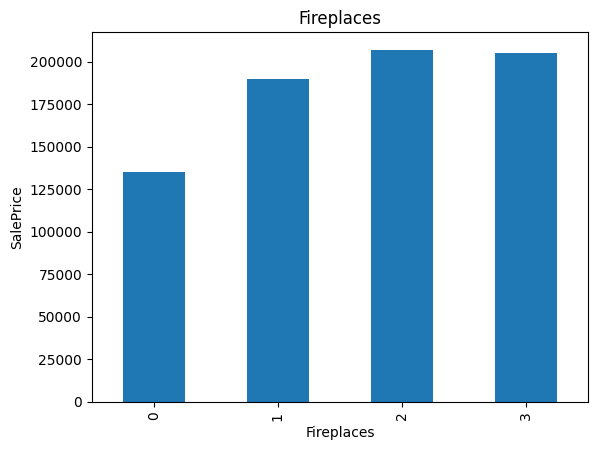

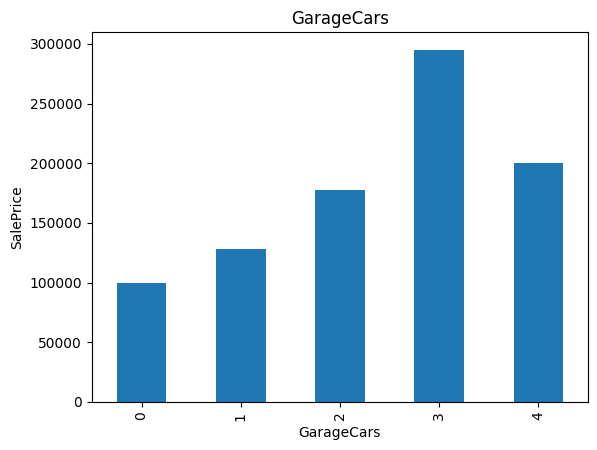

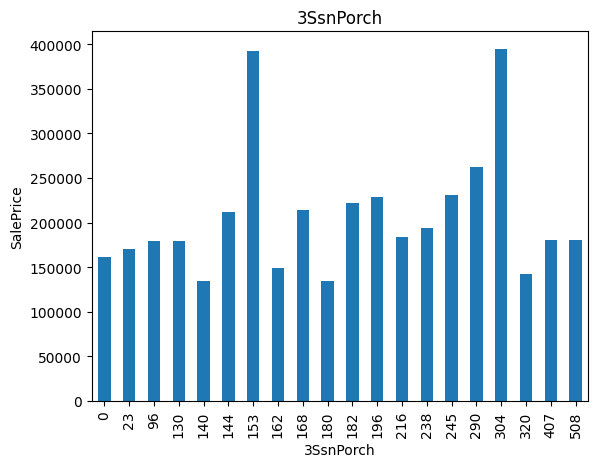

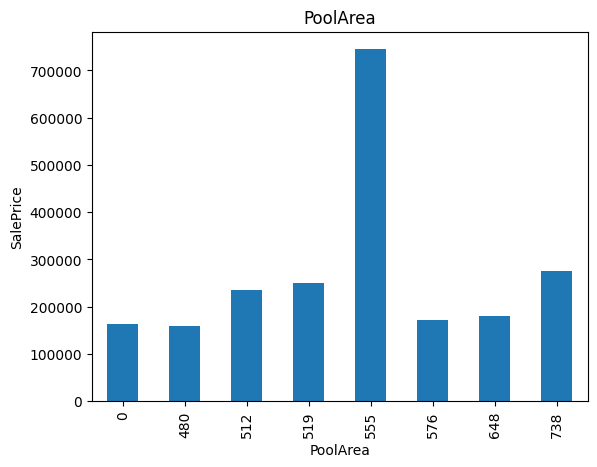

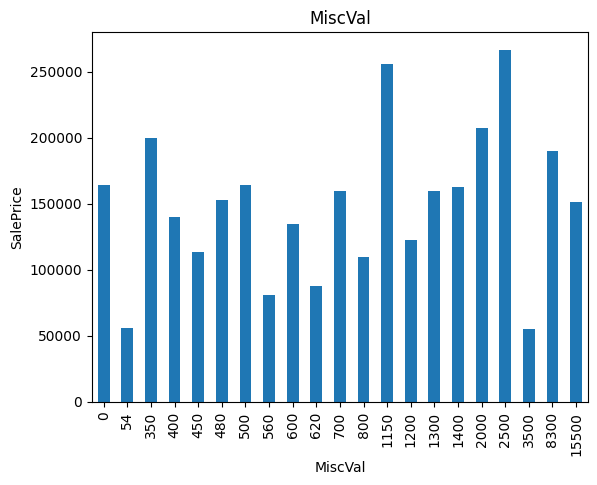

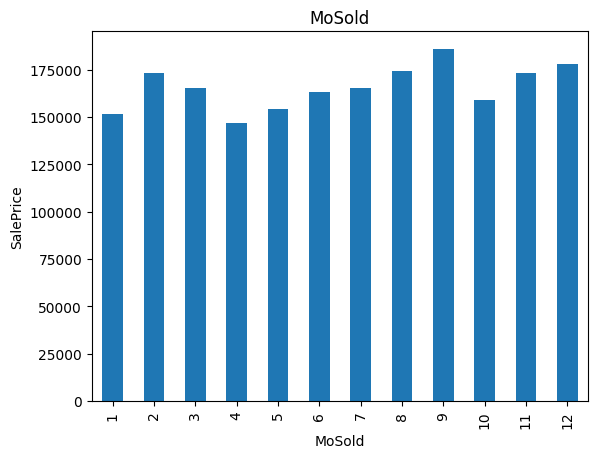

In [15]:
for feature in discrete_feature:
    data=df.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

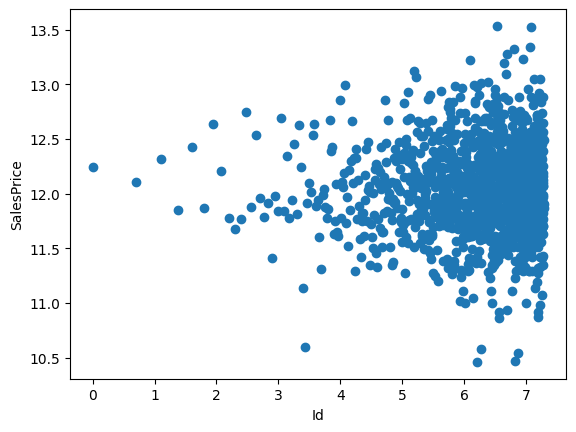

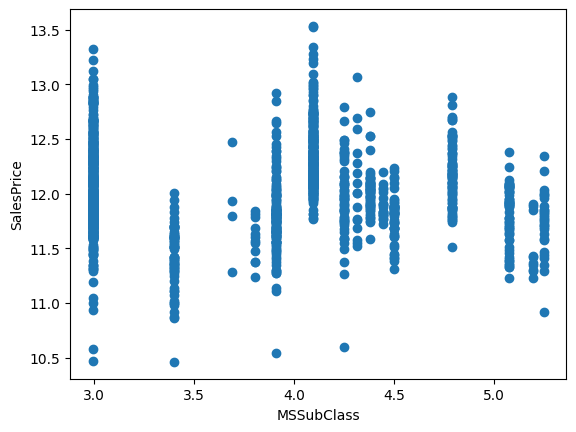

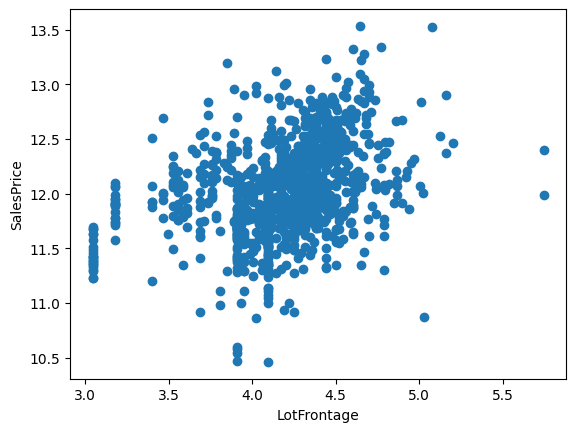

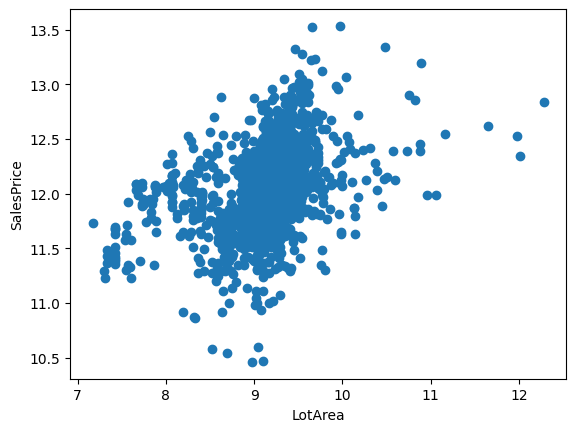

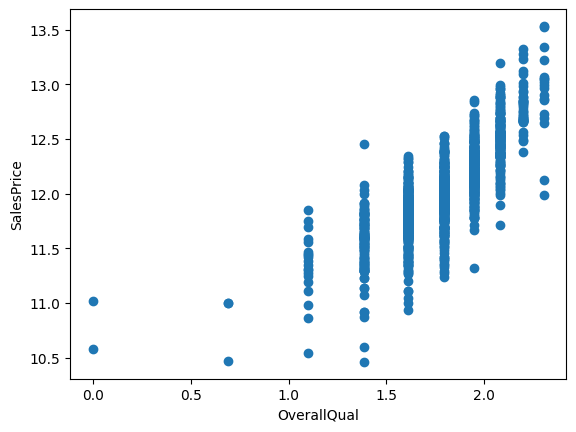

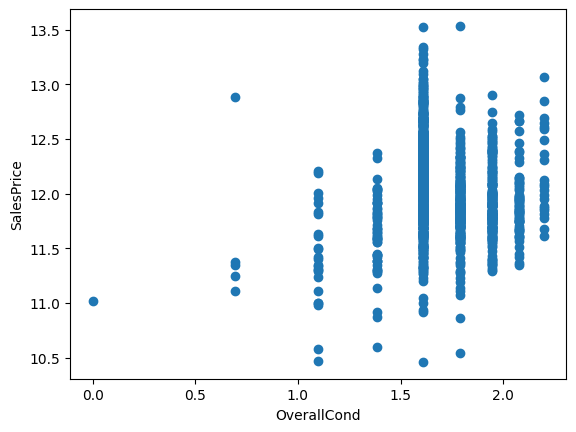

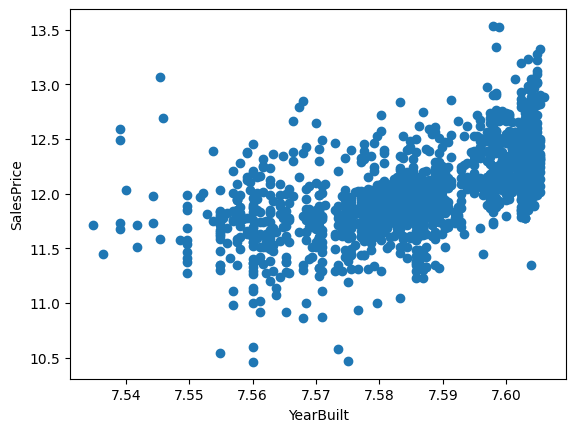

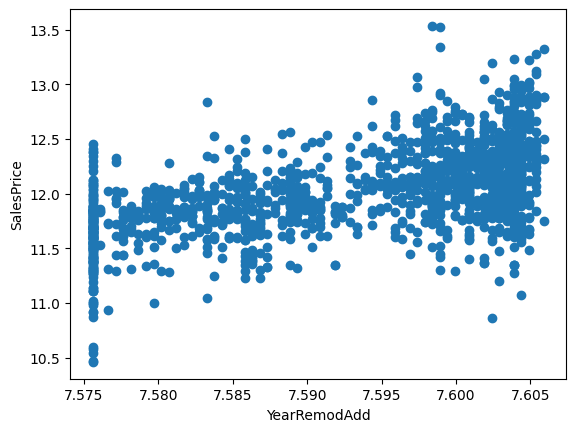

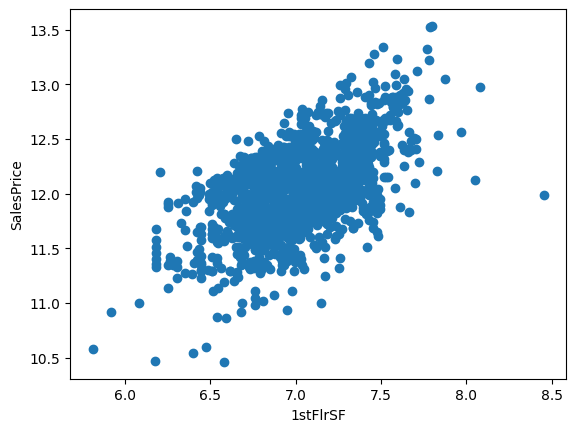

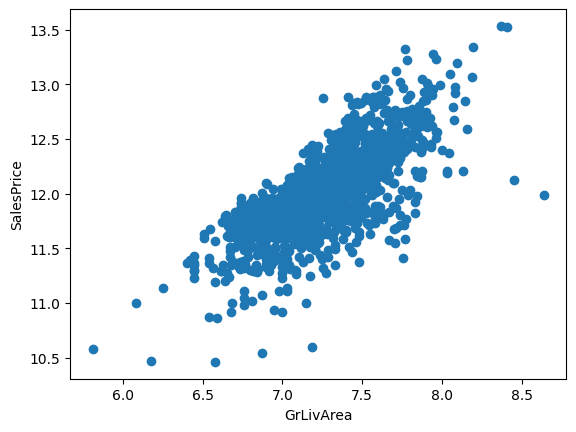

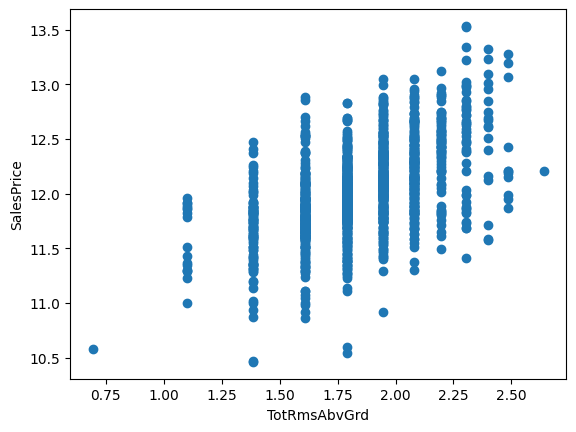

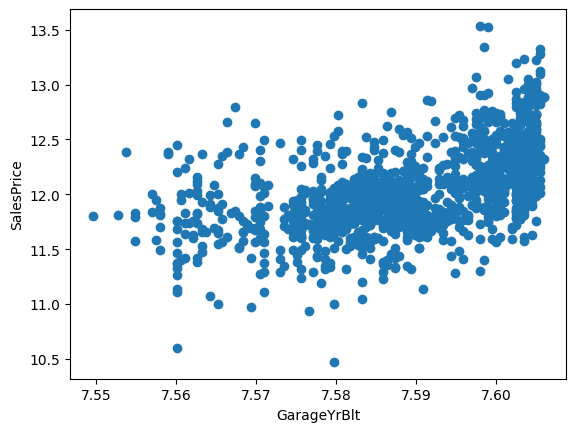

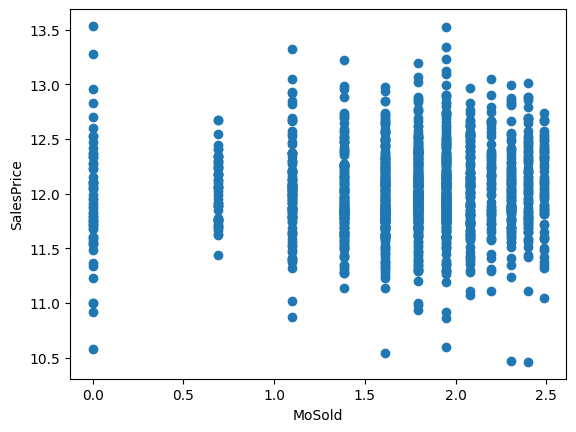

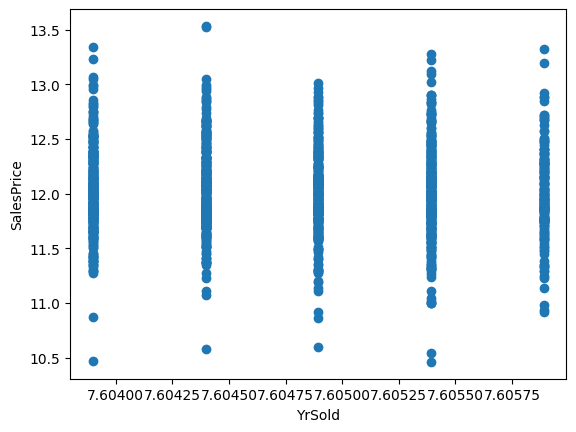

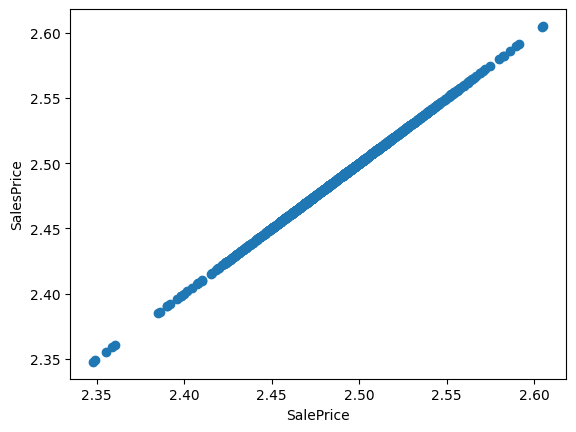

In [16]:
for feature in numerical_features:
    data =df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalesPrice")
        plt.show()

In [17]:
missing_features=check_missing_value(df)

LotFrontage  feature has  259  missing value
Alley  feature has  1369  missing value
MasVnrType  feature has  8  missing value
MasVnrArea  feature has  8  missing value
BsmtQual  feature has  37  missing value
BsmtCond  feature has  37  missing value
BsmtExposure  feature has  38  missing value
BsmtFinType1  feature has  37  missing value
BsmtFinType2  feature has  38  missing value
Electrical  feature has  1  missing value
FireplaceQu  feature has  690  missing value
GarageType  feature has  81  missing value
GarageYrBlt  feature has  81  missing value
GarageFinish  feature has  81  missing value
GarageQual  feature has  81  missing value
GarageCond  feature has  81  missing value
PoolQC  feature has  1453  missing value
Fence  feature has  1179  missing value
MiscFeature  feature has  1406  missing value


In [18]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

The feature is MSZoning and the number of categories are 5
The feature is Street and the number of categories are 2
The feature is Alley and the number of categories are 3
The feature is LotShape and the number of categories are 4
The feature is LandContour and the number of categories are 4
The feature is Utilities and the number of categories are 2
The feature is LotConfig and the number of categories are 5
The feature is LandSlope and the number of categories are 3
The feature is Neighborhood and the number of categories are 25
The feature is Condition1 and the number of categories are 9
The feature is Condition2 and the number of categories are 8
The feature is BldgType and the number of categories are 5
The feature is HouseStyle and the number of categories are 8
The feature is RoofStyle and the number of categories are 6
The feature is RoofMatl and the number of categories are 8
The feature is Exterior1st and the number of categories are 15
The feature is Exterior2nd and the numb

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Feature Engineering

In [20]:
df.drop(['Id'],axis=1,inplace=True)

In [21]:
for i in missing_features:
    if i in numerical_features:
        temp=df[i].mean()
        df[i].fillna(temp,inplace=True)
    if i in categorical_features:
        temp=df[i].mode()[0]
        df[i].fillna(temp,inplace=True)

In [22]:
missing_features=check_missing_value(df)
print("Number of Features having missing values : ",len(missing_features))

Number of Features having missing values :  0


In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [24]:
for i in categorical_features:
    dict={}
    count=1
    for j in df[i].unique():
        dict[j]=count
        count+=1
    df[i]=df[i].map(dict)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,1,65.0,8450,1,1,1,1,1,1,1,1,1,1,1,1,7,5,2003,2003,1,1,1,1,1,196.0,1,1,1,1,1,1,1,706,1,0,150,856,1,1,1,1,856,854,0,1710,1,0,2,1,3,1,1,8,1,0,1,1,2003.0,1,2,548,1,1,1,0,61,0,0,0,0,1,1,1,0,2,2008,1,1,208500
1,20,1,80.0,9600,1,1,1,1,1,2,1,2,2,1,1,2,6,8,1976,1976,1,1,2,2,2,0.0,2,1,2,1,1,2,2,978,1,0,284,1262,1,1,1,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1,2,1,1976.0,1,2,460,1,1,1,298,0,0,0,0,0,1,1,1,0,5,2007,1,1,181500
2,60,1,68.0,11250,1,1,2,1,1,1,1,1,1,1,1,1,7,5,2001,2002,1,1,1,1,1,162.0,1,1,1,1,1,3,1,486,1,0,434,920,1,1,1,1,920,866,0,1786,1,0,2,1,3,1,1,6,1,1,2,1,2001.0,1,2,608,1,1,1,0,42,0,0,0,0,1,1,1,0,9,2008,1,1,223500
3,70,1,60.0,9550,1,1,2,1,1,3,1,3,1,1,1,1,7,5,1915,1970,1,1,3,3,2,0.0,2,1,3,2,2,1,2,216,1,0,540,756,1,2,1,1,961,756,0,1717,1,0,1,0,3,1,1,7,1,1,1,2,1998.0,2,3,642,1,1,1,0,35,272,0,0,0,1,1,1,0,2,2006,1,2,140000
4,60,1,84.0,14260,1,1,2,1,1,2,1,4,1,1,1,1,8,5,2000,2000,1,1,1,1,1,350.0,1,1,1,1,1,4,1,655,1,0,490,1145,1,1,1,1,1145,1053,0,2198,1,0,2,1,4,1,1,9,1,1,2,1,2000.0,1,3,836,1,1,1,192,84,0,0,0,0,1,1,1,0,12,2008,1,1,250000


In [26]:
categorical_features , numerical_features = check_features_datatype(df)
print("Number of Categorical features : ",len(categorical_features))

Number of Categorical features :  0


# splitting data

In [45]:
from sklearn.model_selection import train_test_split

In [60]:
x = df.drop(['SalePrice'],axis=1)
y=df['SalePrice']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature Selection

In [61]:
from sklearn.feature_selection import mutual_info_regression , SelectPercentile

In [62]:
mutual_info = mutual_info_regression(x_train , y_train)
mutual_info

array([0.27699687, 0.10817509, 0.14859805, 0.17258228, 0.00476112,
       0.        , 0.0814061 , 0.0212277 , 0.        , 0.02394752,
       0.0091717 , 0.45385436, 0.02249431, 0.00497109, 0.04293234,
       0.10559863, 0.52189974, 0.09820905, 0.34141217, 0.23780028,
       0.02103195, 0.01720043, 0.14816432, 0.17134797, 0.10544968,
       0.08776201, 0.29399894, 0.01498953, 0.18106768, 0.3106844 ,
       0.02702232, 0.06915856, 0.148409  , 0.13702391, 0.        ,
       0.00703873, 0.15463714, 0.34740969, 0.02313304, 0.17043427,
       0.1014939 , 0.04128674, 0.29552886, 0.21072085, 0.        ,
       0.45527922, 0.03051745, 0.00283368, 0.27188306, 0.05951043,
       0.05325205, 0.02007821, 0.29432319, 0.16990858, 0.01044903,
       0.15116773, 0.09626807, 0.11693874, 0.2618633 , 0.24127118,
       0.35845994, 0.36025431, 0.00255593, 0.01791007, 0.06056735,
       0.08979251, 0.1557562 , 0.01780509, 0.        , 0.00984841,
       0.00740607, 0.        , 0.01955895, 0.        , 0.     

In [63]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual     0.521900
GrLivArea       0.455279
Neighborhood    0.453854
GarageArea      0.360254
GarageCars      0.358460
                  ...   
MiscVal         0.000000
MoSold          0.000000
LowQualFinSF    0.000000
BsmtFinType2    0.000000
Alley           0.000000
Length: 79, dtype: float64

In [64]:
mutual_info.head()

MSSubClass     0.276997
MSZoning       0.108175
LotFrontage    0.148598
LotArea        0.172582
Street         0.004761
dtype: float64

<AxesSubplot: >

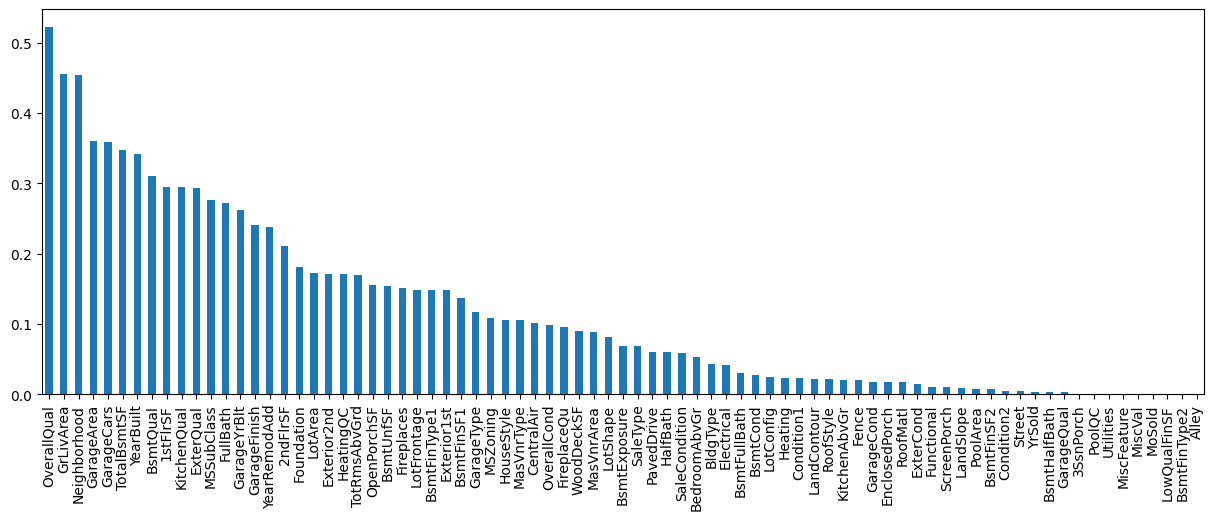

In [65]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [66]:
from sklearn.feature_selection import SelectPercentile

In [67]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=60)
selected_top_columns.fit(x_train, y_train)

SelectPercentile(percentile=60,
                 score_func=<function mutual_info_regression at 0x000001D8EDCC8D30>)

In [68]:
selected_top_columns.get_support()

array([ True,  True,  True,  True, False, False,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [69]:
selected_columns = x_train.columns[selected_top_columns.get_support()]

In [70]:
print("Out of total {} features Selected Features are {}".format(len(x_train.columns),len(selected_columns)))

Out of total 79 features Selected Features are 47


In [71]:
selected_train_features = x_train[selected_columns]
selected_train_features

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
254,20,1,70.0,8400,1,12,1,1,2,5,6,1957,1957,2,2,2,0.0,2,2,2,1,4,922,392,1314,3,1,1,1314,0,1314,1,0,3,2,5,0,1,1,1957.000000,1,1,294,250,0,1,1
1066,60,1,59.0,7837,2,18,1,1,1,6,7,1993,1994,1,1,2,0.0,1,1,1,1,3,0,799,799,2,1,1,799,772,1571,2,1,3,2,7,1,2,1,1993.000000,1,2,380,0,40,1,1
638,30,1,67.0,8777,1,16,2,1,2,5,7,1910,1950,2,6,2,0.0,2,2,4,1,3,0,796,796,2,1,3,796,0,796,1,0,2,2,4,0,1,1,1978.506164,2,0,0,328,0,1,1
799,50,1,60.0,7200,1,24,2,1,3,5,7,1937,1950,3,6,1,252.0,2,3,1,1,2,569,162,731,1,1,1,981,787,1768,1,1,3,1,7,2,2,2,1939.000000,2,1,240,0,0,1,1
380,50,1,50.0,5000,1,24,1,1,3,5,6,1924,1950,5,6,2,0.0,2,3,2,1,6,218,808,1026,3,1,1,1026,665,1691,2,0,3,1,6,1,1,2,1924.000000,2,1,308,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,1,78.0,9317,2,1,1,1,2,6,5,2006,2006,1,1,2,0.0,1,1,1,1,1,24,1290,1314,2,1,1,1314,0,1314,2,0,3,1,6,1,1,1,2006.000000,1,2,440,0,22,1,1
1130,50,1,65.0,7804,1,24,1,1,3,4,3,1928,1950,6,5,2,0.0,2,3,2,1,5,622,500,1122,3,1,1,1328,653,1981,2,0,4,1,7,2,2,2,1981.000000,2,2,576,431,44,1,1
1294,20,1,60.0,8172,1,16,1,1,2,5,7,1955,1990,6,5,2,0.0,2,2,2,1,4,167,697,864,3,1,1,864,0,864,1,0,2,2,5,0,1,2,1957.000000,2,2,572,0,0,1,1
860,50,1,55.0,7642,1,3,1,1,3,7,8,1918,1998,3,6,2,0.0,1,3,2,1,3,0,912,912,2,1,1,912,514,1426,1,1,3,1,7,1,1,2,1925.000000,2,1,216,0,240,1,1


In [72]:
selected_test_features = x_test[selected_columns]
selected_test_features

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
892,20,1,70.0,8414,1,10,1,1,2,6,8,1963,2003,4,4,2,0.0,2,2,2,1,1,663,396,1059,3,1,1,1068,0,1068,1,0,3,2,6,0,1,1,1963.0,1,1,264,192,0,1,1
1105,60,1,98.0,12256,2,4,1,1,1,8,5,1994,1995,4,4,1,362.0,1,1,3,4,1,1032,431,1463,1,1,1,1500,1122,2622,2,1,3,1,9,2,2,1,1994.0,1,2,712,186,32,1,1
413,30,2,56.0,8960,1,8,4,1,2,5,6,1927,1950,6,3,2,0.0,2,2,2,1,3,0,1008,1008,2,1,3,1028,0,1028,1,0,2,2,5,1,1,2,1927.0,2,2,360,0,0,1,1
522,50,2,50.0,5000,1,9,2,1,3,6,7,1947,1950,7,7,2,0.0,2,2,2,1,2,399,605,1004,1,1,1,1004,660,1664,2,0,3,2,7,2,1,2,1950.0,2,2,420,0,24,1,1
1036,20,1,89.0,12898,2,17,1,1,2,9,5,2007,2008,1,1,3,70.0,1,1,3,2,1,1022,598,1620,1,1,1,1620,0,1620,2,0,2,3,6,1,4,1,2008.0,3,3,912,228,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,30,2,50.0,5925,1,8,1,1,2,4,7,1937,2000,10,9,4,435.0,2,3,4,1,4,168,739,907,3,1,1,1131,0,1131,1,0,2,2,7,0,1,2,1995.0,2,2,672,0,72,1,5
1361,20,1,124.0,16158,2,19,1,1,2,7,5,2005,2005,1,1,3,16.0,1,1,3,4,2,1274,256,1530,1,1,1,1530,0,1530,2,0,3,1,7,1,1,1,2005.0,3,2,430,168,36,1,1
802,60,1,63.0,8199,1,1,1,1,1,7,5,2005,2005,6,3,2,0.0,1,1,1,4,1,648,80,728,1,1,1,728,728,1456,2,1,3,1,7,1,1,1,2005.0,3,2,410,36,18,1,1
651,70,1,60.0,9084,1,16,4,1,1,4,5,1940,1950,2,2,2,0.0,2,2,2,3,3,0,755,755,3,1,1,755,755,1510,1,0,4,2,7,1,1,2,1940.0,2,1,296,120,0,1,1


# Applying Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [74]:
lr = LinearRegression()
lr.fit(selected_train_features , y_train)
pred = lr.predict(selected_test_features)
print(r2_score(pred , y_test))

0.7724493615902966
